In [43]:
import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv(r'C:\Users\SHASHANK\OneDrive\Desktop\Evelate labs\HR_Attrition_Analysis\📁 data\HR_data.csv')
model = joblib.load(r'C:\Users\SHASHANK\OneDrive\Desktop\Evelate labs\HR_Attrition_Analysis\📁 scripts\attrition_model.pkl')

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.dropna(inplace=True)
df['Attrition'] = le.fit_transform(df['Attrition'])
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [55]:
X = df.drop('Attrition', axis=1)

In [56]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

<Figure size 640x480 with 0 Axes>

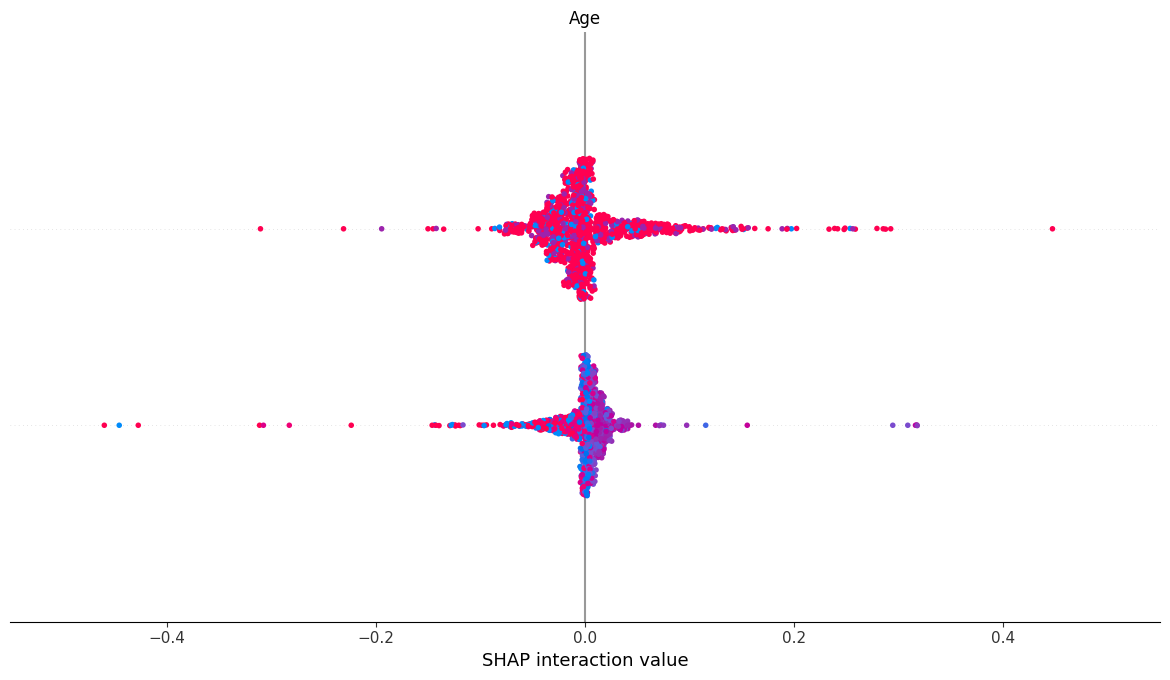

In [57]:
shap.summary_plot(shap_values, X)

In [ ]:
df = pd.read_csv(r'C:\Users\SHASHANK\OneDrive\Desktop\Evelate labs\HR_Attrition_Analysis\📁 data\HR_data.csv')
model = joblib.load(r'C:\Users\SHASHANK\OneDrive\Desktop\Evelate labs\HR_Attrition_Analysis\📁 scripts\attrition_model.pkl')

In [85]:
print("X shape:", X.shape)                            # Feature matrix shape
print("X.iloc[0].shape:", X.iloc[0].shape)            # Single row shape
print("SHAP values shape:", shap_values[1][0].shape)  # SHAP values for first instance
print("Feature names count:", len(X.columns))         # Feature count


X shape: (1470, 34)
X.iloc[0].shape: (34,)
SHAP values shape: (2,)
Feature names count: 34


c:\python\Lib\site-packages\shap\plots\_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


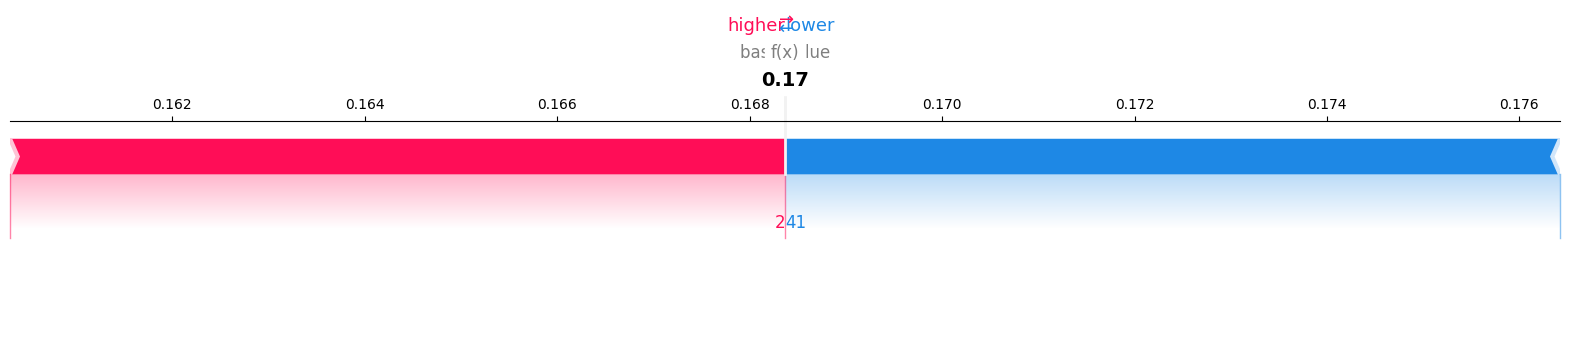

In [86]:
shap.initjs()

# Slice X.iloc[0] to only include as many features as shap_values[1][0]
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0],
    X.iloc[0, :len(shap_values[1][0])].values,  # Trim feature vector to match SHAP vector
    matplotlib=True
)
